**Step 1 : Set Up the Environment**

In [ ]:
!pip install transformers torchvision torch

**Step 2: Upload the Dataset to Colab and unzip**

In [ ]:

import zipfile
import os

# Path to your zip file
zip_path = "/content/archive (15).zip"
extract_path = "/content/extracted_archive"

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("File unzipped successfully!")


File unzipped successfully!


**Step 3: Import Libraries**

In [ ]:
import os
import torch
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor

**Step 4: Preprocess the Dataset**

In [ ]:
# Initialize feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std),
])

# Load dataset
dataset_path = '/content/extracted_archive/caltech-101'  # Update this with your dataset folder
dataset = ImageFolder(root=dataset_path, transform=transform)

# Verify dataset classes
print(f"Classes: {dataset.classes}")
print(f"Total Images: {len(dataset)}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Classes: ['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'sn

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


**Step 5: Split Dataset into Train/Test Sets**

In [ ]:
# Split dataset (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

Training samples: 7315
Testing samples: 1829


**Step 6: Load Pretrained Vision Transformer Model**

In [ ]:
from transformers import ViTForImageClassification
import torch

# Load pre-trained ViT model with a fix for mismatched sizes
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=102,  # Update this with the number of classes in your dataset
    ignore_mismatched_sizes=True
)

# Modify the final classifier layer to match the number of classes in Caltech 101 dataset
model.classifier = torch.nn.Linear(model.config.hidden_size, 102)

# Send the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)




config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([102]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([102, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

**Step 7: Define Training and Evaluation Loops**

In [ ]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

# Define optimizer and loss function
optimizer = Adam(model.parameters(), lr=1e-4)
loss_fn = CrossEntropyLoss()

# Training function
def train_one_epoch(model, data_loader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0
    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images).logits
        loss = loss_fn(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(data_loader)

# Evaluation function
def evaluate(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

Step 8: **Train the Model**

In [ ]:
# Training loop
epochs = 5
for epoch in range(epochs):
    train_loss = train_one_epoch(model, train_loader, optimizer, loss_fn, device)
    test_accuracy = evaluate(model, test_loader, device)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/5, Loss: 0.9837, Test Accuracy: 0.9595
Epoch 2/5, Loss: 0.0637, Test Accuracy: 0.9639
Epoch 3/5, Loss: 0.0216, Test Accuracy: 0.9754
Epoch 4/5, Loss: 0.0114, Test Accuracy: 0.9710
Epoch 5/5, Loss: 0.0053, Test Accuracy: 0.9716


In [ ]:
# Save the trained model
model.save_pretrained('/content/vit-caltech101')
print("Model saved successfully!")


Model saved successfully!


**Step 9: Visualize Results**

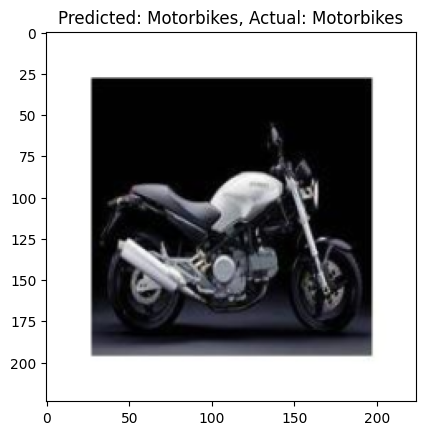

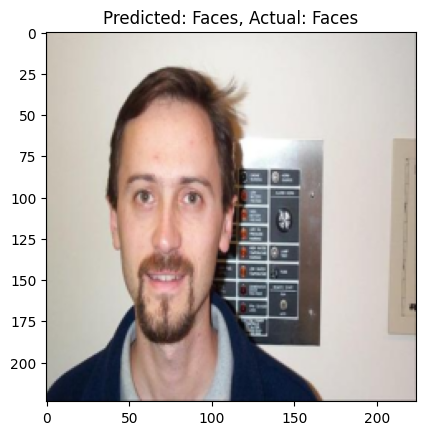

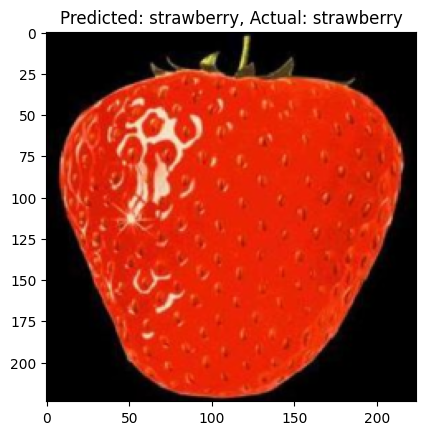

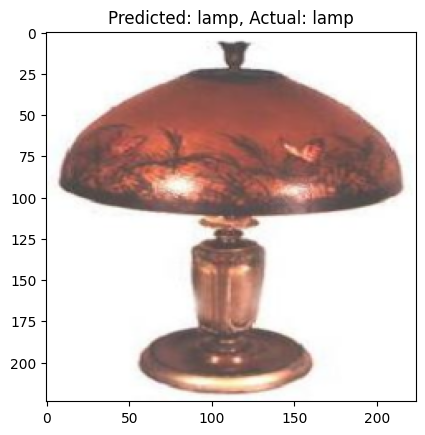

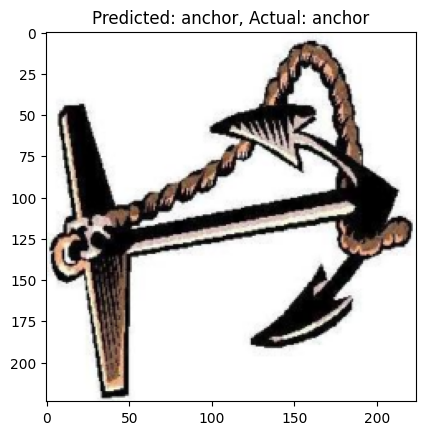

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of test data
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Make predictions
outputs = model(images).logits
_, preds = torch.max(outputs, dim=1)

# Visualize
for i in range(5):
    img = images[i].cpu().permute(1, 2, 0).numpy()
    img = img * feature_extractor.image_std + feature_extractor.image_mean  # Unnormalize
    plt.imshow(img)
    plt.title(f"Predicted: {dataset.classes[preds[i]]}, Actual: {dataset.classes[labels[i]]}")
    plt.show()

**Step 10: Testing **

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import requests
from io import BytesIO


**Testing 1**

In [ ]:

image_url = "https://media.istockphoto.com/id/136486605/photo/ant-on-grass.jpg?s=612x612&w=0&k=20&c=SbqumVR3gbNY6rN8eiZ_PbvYxerntz3U-Af0eS5Qa3I="
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT expects 224x224 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Pre-trained mean/std
])

img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension and send to device


In [ ]:
with torch.no_grad():
    outputs = model(img_tensor)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()  # Get the predicted class label

print(f"Predicted Class: {predicted_class}")


Predicted Class: 8


In [ ]:

class_names = dataset.classes  # This would be an attribute from your dataset class

# Get the actual class name
predicted_label = class_names[predicted_class]
print(f"Predicted Label: {predicted_label}")


Predicted Label: ant


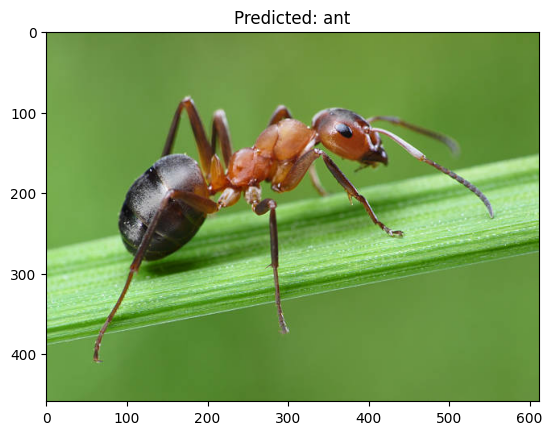

In [ ]:
import matplotlib.pyplot as plt

# Show the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.show()

**Testing 2**

In [ ]:
image_url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAkngjqn7V-90tYDmnEuuemyDtZSdRQybv7w&s"
response = requests.get(image_url2)
img2 = Image.open(BytesIO(response.content))

# Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT expects 224x224 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Pre-trained mean/std
])

img_tensor = transform(img2).unsqueeze(0).to(device)

In [ ]:
with torch.no_grad():
    outputs = model(img_tensor)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()  # Get the predicted class label

print(f"Predicted Class: {predicted_class}")

Predicted Class: 81


In [ ]:
class_names = dataset.classes  # This would be an attribute from your dataset class

# Get the actual class name
predicted_label = class_names[predicted_class]
print(f"Predicted Label: {predicted_label}")

Predicted Label: scissors


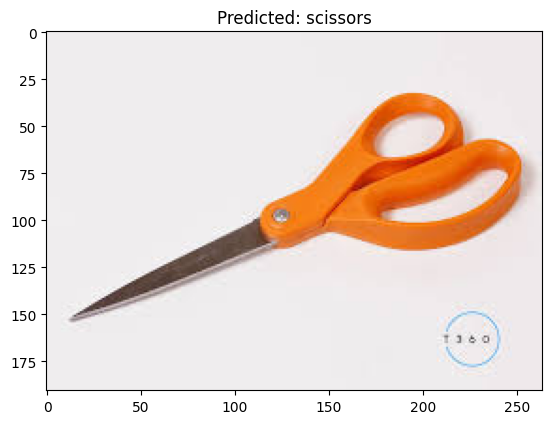

In [ ]:
import matplotlib.pyplot as plt

# Show the image
plt.imshow(img2)
plt.title(f"Predicted: {predicted_label}")
plt.show()